# Linear and polynomial regression [50 points]

## a) Load the data and plot it

### Load data

In [2]:
## if this fails to run, just run it again
from google.colab import files
t_data = files.upload()

Saving hw1x.dat to hw1x (1).dat
Saving hw1y.dat to hw1y (1).dat


### Instantiate data and plot a scatter of it

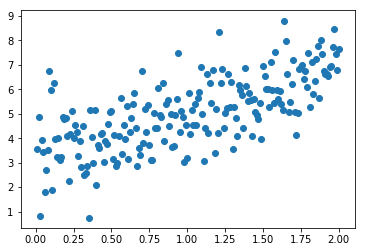

In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x_values = pd.read_csv('hw1x.dat', header=None)
y_values = pd.read_csv('hw1y.dat', header=None)

plt.scatter(x_values, y_values)


## b) Add column vector of 1s to the inputs and write function implementing the closed form linear regression formula to obtain weight vector theta. Plot both linear regression line and the data on the same graph

### Combine with 1s vector into matrix


In [0]:
column_of_ones = pd.DataFrame(np.ones(len(x_values))).to_numpy()

# add column vector of 1s to inputs
new_x = np.column_stack((column_of_ones, x_values.to_numpy()))


### Define closed form linear regression formula and return theta


In [0]:
def closed_form_l_r(inputs, labels):
  n = len(inputs)
  
  X = inputs
  X_transposed = np.transpose(X)
  Y = labels
  
  # get b --- Xtranpose dot Y over n
  mat_b = (np.dot(X_transposed, Y))/n
  
  # get A --- Xtranspose dot X
  mat_A = (np.dot(X_transposed, X))/n
  
  # get weight theta
  mat_A_inv = np.linalg.inv(mat_A)
  
  theta = np.dot(mat_A_inv, mat_b)
  
  return theta

### Plot the linear regression line with the data

theta: [[3.2447227 ]
 [1.78157138]]


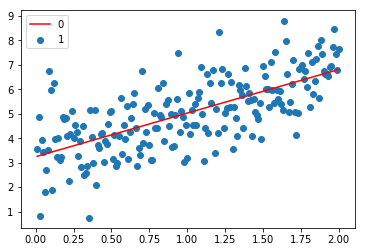

In [340]:
weights = closed_form_l_r(new_x, y_values)

plt.scatter(x_values, y_values)
plt.plot(x_values, new_y, 'r')
plt.legend([0,1])

print("theta: " + str(weights))
new_y = np.dot(new_x, weights)


## c) Write a function that will evaluate the training error in terms of empirical risk of the resulting fit in 2(b) and report the error

In [0]:
def empirical_loss(x, y, weights):
  n = len(x)
  # loss = 1/2 z^2
  z = y - np.dot(x, weights)
  loss = 0.5 * (z**2)
  # empirical risk
  risk = (1/n) * (np.sum(loss))
  
  
  return risk



## Error in terms of empirical risk returned

In [362]:
err = empirical_loss(new_x, y_values, weights)
print("The empirical loss = " + str(err[0]))

The empirical loss = 0.5812605752543938


## d) Write a function to calculate the weight vector theta using gradient descent. Consider learning rate as n=0.01 and number of iterations as 100. Report theta for min empirical risk from all the iterations

In [0]:
## takes in dataframs of x and y
def gradient_d(x, y, epochs, l_r):
  
  # initiate number of weights based on input x
  num_inputs = np.shape(x)[1]
  X = x
  Y = y.to_numpy()
  weights = np.zeros(num_inputs)
  
  risks=[]
  weight_array = []
  
  for epoch in range(epochs):
    for i, tr_input in enumerate(X):
      subtract = Y[i] - np.dot(tr_input, weights)
      # update the weights
      weights += l_r * subtract * tr_input
      
    risks.append(empirical_loss(X, Y, weights))
    weight_array.append(weights)
  
  index_min_r = np.argmin(np.array(risks))
  
  theta = weight_array[index_min_r]
  
  return theta

In [364]:
gd_weights = gradient_d(new_x, y_values, 100, 0.01)


print("Theta for min empirical risk (GD): " + str(gd_weights))


Theta for min empirical risk (GD): [3.13074422 1.96402963]


## e) Write a function to calculate the weight vector theta using SGD. Consider learning rate n=0.01 and number of iterations as 50. Report theta for min empirical risk from all iterations

In [0]:
## same as GD but with randomized inputs

## takes in dataframs of x and y
def sgd(x, y, epochs, l_r):
  
  # initiate number of weights based on input x
  num_inputs = np.shape(x)[1]
  X = x
  Y = y.to_numpy()
  weights = np.zeros(num_inputs)
  
  risks=[]
  weight_array = []
  
  for epoch in range(epochs):
    # add the updates in here to be randomized and iterated through
    updates = []
    
    for i, tr_input in enumerate(X):
      subtract = Y[i] - np.dot(tr_input, weights)
      # update the weights
      to_randomize.append(l_r * subtract * tr_input)
    
    # iterate randomly
    to_randomize = np.array(updates)
    np.random.shuffle(to_randomize)
    
    # update theta based on the randomly assorted update values
    for i in to_randomize:
      weights += i
    
    risks.append(empirical_loss(X, Y, weights))
    weight_array.append(weights)
  
  index_min_r = np.argmin(np.array(risks))
  theta = weight_array[index_min_r]
  
  return theta

In [366]:
sgd_weights = gradient_d(new_x, y_values, 50, 0.01)


print("Theta for min empirical risk (SGD): " + str(sgd_weights))


Theta for min empirical risk (SGD): [3.13074422 1.96402963]


## f) Write a function called PolyRegress(x,y,d) which adds the features x^2 ... x^d to the inputs and performas polynomial regression using closed form solution

In [0]:
def PolyRegress(x, y, d):
  
  n = len(x)
  X = x
  Y = y
  
  # create new input x based on d
  if (d >= 2):
    array_of_x = [x]
    for i in range(2,d+1):
      array_of_x.append(x**i)
      
    # new x inputs replaces previous X  
    X = np.column_stack(array_of_x)
   
  X_transposed = np.transpose(X)
  
  # get b --- Xtranpose dot Y over n
  mat_b = (np.dot(X_transposed, Y))/n
  
  # get A --- Xtranspose dot X
  mat_A = (np.dot(X_transposed, X))/n
  
  # get weight theta
  mat_A_inv = np.linalg.inv(mat_A)
  
  theta = np.dot(mat_A_inv, mat_b)
  
  # return set of y values for regression line
  ys = np.dot(X, theta)
  
  return [ys, theta, X]

## g) Use your function to get a quadratic fit of the data. Plot the data and the fit. Report the training error. Is this a better fit? Repeat the same for 3rd order fit to 9th order fit. After which order fit does the error get worse?

## Plot the data and the fit


The empirical loss = 1.2684779949026175


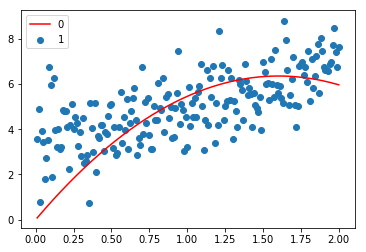

In [369]:
# test with quadratic function

poly_y_values, poly_weights, poly_x_values = PolyRegress(x_values,y_values, 2)

plt.scatter(x_values, y_values)
plt.plot(x_values, poly_y_values, 'r')
plt.legend([0,1])

poly_err = empirical_loss(poly_x_values, y_values, poly_weights)

print("The empirical loss = " + str(poly_err[0]))



Yes it is

### Repeat for 3rd to 9th


Number 3 order, 0.9437826407153135
Number 4 order, 0.8441799172817009
Number 5 order, 0.7395928826380531
Number 6 order, 0.6676822164923446
Number 7 order, 0.6153228771212186
Number 8 order, 0.5886568301551328
Number 9 order, 0.5753594195767032
Number 10 order, 0.572443176142311
Number 11 order, 0.5774260320255253
Number 12 order, 709.0978519648535
Number 13 order, 92.33667041783953


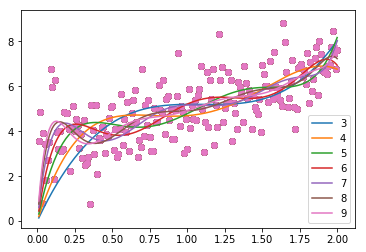

In [371]:

for i in range(3,14):
  
  poly_y_values, poly_weights, poly_x_values = PolyRegress(x_values,y_values, i)
  
  if (i <= 9):
    plt.scatter(x_values, y_values)
    plt.plot(x_values, poly_y_values)

  print("Number " + str(i) + " order, " +str(empirical_loss(poly_x_values, y_values, poly_weights)[0]))
 
plt.legend([str(i) for i in range(3,10)])

## The error starts to get worse after order 11